In [2]:
import torch
import torch.nn as nn  # Neural network module
import matplotlib.pyplot as plt  # For plotting

In [3]:
#  Generate Input Data (X) and Output Data (y)
torch.manual_seed(71)  # For reproducibility
#Include your code here
X = torch.linspace(1,70,70).reshape(-1,1)
e = torch.randint(-8,9,(70,1),dtype=torch.float)

y = 2*X + 1 + e
print(y.shape)


torch.Size([70, 1])


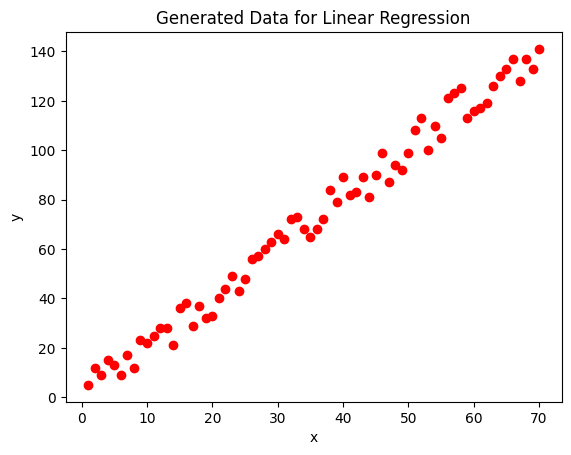

In [4]:
# Plot the original data
plt.scatter(X, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

In [5]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [6]:
# Initialize the Model
torch.manual_seed(59)  # Ensure same initial weights
model = Model(1, 1)

In [7]:
# Print Initial Weights and Bias
initial_weight = model.linear.weight.item()
initial_bias = model.linear.bias.item()
print("\nName: KESAV DEEPAK SRIDHARAN")
print("Register No: 212223230104")
print(f'Initial Weight: {initial_weight:.8f}, Initial Bias: {initial_bias:.8f}\n')


Name: KESAV DEEPAK SRIDHARAN
Register No: 212223230104
Initial Weight: 0.10597813, Initial Bias: 0.96379614



In [8]:
# Define Loss Function & Optimizer
loss_function = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

In [9]:
epochs = 50
losses = []

for epoch in range(1, epochs + 1):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_function(y_pred, y)
    losses.append(loss.item())

    loss.backward()
    optimizer.step()


    print(f'epoch: {epoch:2}  loss: {loss.item():10.8f}  '
          f'weight: {model.linear.weight.item():10.8f}  '
          f'bias: {model.linear.bias.item():10.8f}')

epoch:  1  loss: 5954.00195312  weight: 0.73509312  bias: 0.97723663
epoch:  2  loss: 2655.30761719  weight: 1.15417695  bias: 0.98620772
epoch:  3  loss: 1191.49755859  weight: 1.43334889  bias: 0.99220157
epoch:  4  loss: 541.92523193  weight: 1.61931860  bias: 0.99621207
epoch:  5  loss: 253.67466736  weight: 1.74320173  bias: 0.99890137
epoch:  6  loss: 125.76227570  weight: 1.82572591  bias: 1.00071061
epoch:  7  loss: 69.00058746  weight: 1.88069904  bias: 1.00193357
epoch:  8  loss: 43.81228256  weight: 1.91731894  bias: 1.00276589
epoch:  9  loss: 32.63482285  weight: 1.94171286  bias: 1.00333810
epoch: 10  loss: 27.67477417  weight: 1.95796239  bias: 1.00373697
epoch: 11  loss: 25.47373009  weight: 1.96878660  bias: 1.00402045
epoch: 12  loss: 24.49699783  weight: 1.97599685  bias: 1.00422692
epoch: 13  loss: 24.06353760  weight: 1.98079956  bias: 1.00438225
epoch: 14  loss: 23.87118340  weight: 1.98399854  bias: 1.00450337
epoch: 15  loss: 23.78580666  weight: 1.98612916  bia

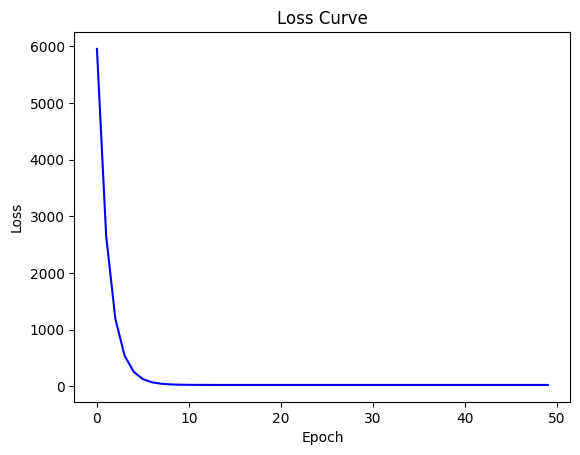

In [10]:
# Plot Loss Curve
plt.plot(range(epochs), losses, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss Curve')
plt.show()

In [11]:
# Final Weights & Bias
final_weight = model.linear.weight.item()
final_bias = model.linear.bias.item()
print("\nName: KESAV DEEPAK SRIDHARAN")
print("Register No: 212223230104")
print(f'\nFinal Weight: {final_weight:.8f}, Final Bias: {final_bias:.8f}')


Name: KESAV DEEPAK SRIDHARAN
Register No: 212223230104

Final Weight: 1.99034309, Final Bias: 1.00654805


In [12]:
#  Best-Fit Line Calculation
x1 = torch.tensor([X.min().item(), X.max().item()]) # Find min and max values of X
y1 = x1 * final_weight + final_bias # Compute corresponding y-values using trained model

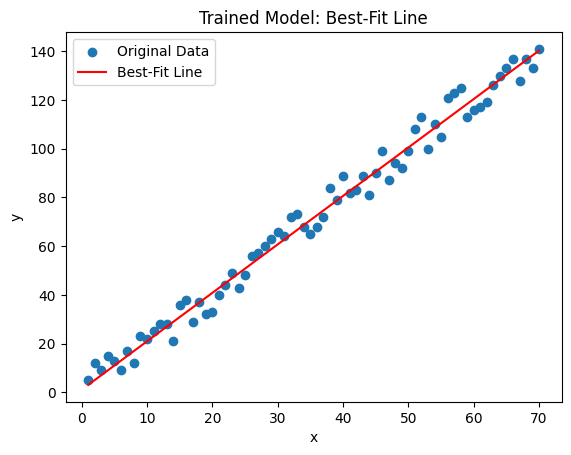

In [13]:
# Plot Original Data & Best-Fit Line
plt.scatter(X, y, label="Original Data")
plt.plot(x1, y1, 'r', label="Best-Fit Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model: Best-Fit Line')
plt.legend()
plt.show()

In [15]:
# Prediction for x = 120
x_new = torch.tensor([[120.0]])  # New input as a tensor
y_new_pred = model(x_new).item()  # Predict using trained model
print("\nName: KESAV DEEPAK SRIDHARAN")
print("Register No: 212223230104")
print(f"\nPrediction for x = 120: {y_new_pred:.8f}")


Name: KESAV DEEPAK SRIDHARAN
Register No: 212223230104

Prediction for x = 120: 239.84771729
